In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from mlp_helper import draw_neural_net, return_weights_notation

In [3]:
np.random.seed(10)
# X = np.random.normal(0, 10, 100)
X = np.linspace(-20, 20, 100)

In [4]:
y = np.abs(X) + np.random.normal(0, 1, len(X))
# y = np.cos(X/4) + np.random.normal(0, 0.01, len(X))

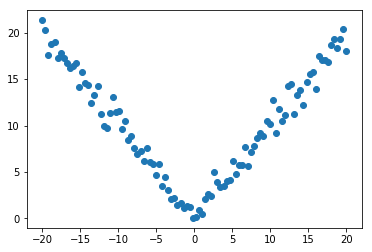

In [5]:
plt.scatter(X, y)

# Model

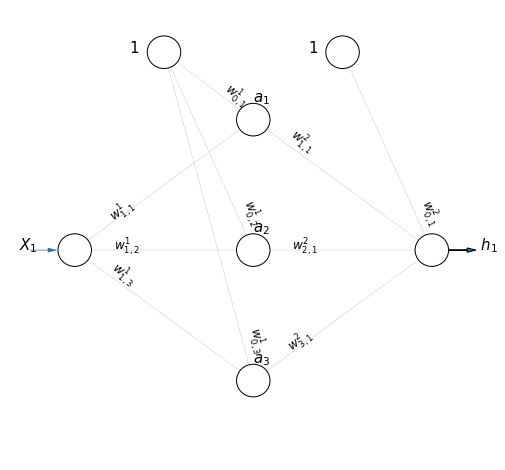

In [47]:
input_dim = 1
hidden_units = 3

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,1]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
activation = 'sigmoid'
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [50]:
from keras.optimizers import Adam, SGD, rmsprop
model.compile(Adam(lr=0.1), loss='mse', metrics=['mse'])

In [51]:
model.fit(X, y, verbose=0, epochs=1000)

In [52]:
y_pred = model.predict(X)

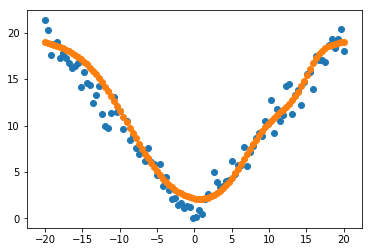

In [53]:
plt.scatter(X, y)
plt.scatter(X, y_pred)

In [54]:
model.get_weights()

[array([[-0.3060006 ,  0.46698034,  0.8834964 ]], dtype=float32),
 array([ -2.712191 ,  -3.1798983, -13.408187 ], dtype=float32),
 array([[19.099367],
        [11.840165],
        [ 6.819078]], dtype=float32),
 array([0.4850197], dtype=float32)]

In [55]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

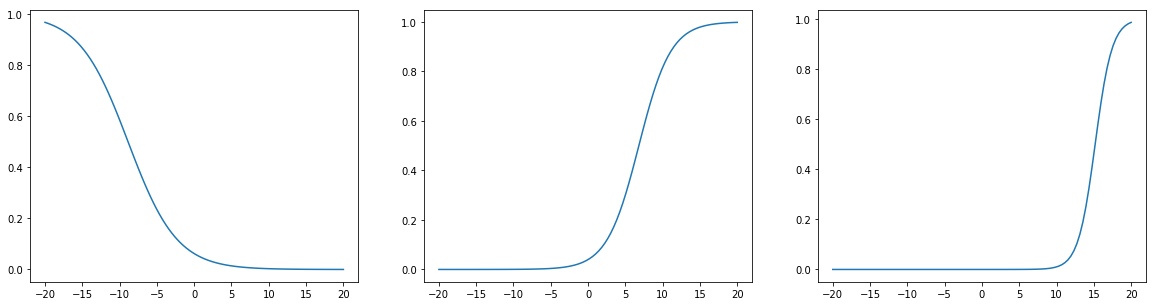

In [56]:
f, ax = plt.subplots(1, hidden_units, figsize=(20,5))
sub_models = []
preds = []
for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation, input_dim=1)
    sub_models.append(sub_model)
    preds.append(sub_model.predict(X))
    ax[i].plot(X, preds[i])

In [57]:
! pwd

/Users/julianganzabal/Documents/facultad/lab-ml/MLP
